# Predição de Série Temporal

**Questão 4 -** Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal _x(n) = sen(n + sen²(n))_ . Avalie o desempenho mostrando para cada caso os erros de predição.

#### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Importando os Dados

In [2]:
X = []
y = []

X= np.loadtxt('./data_files/data_x.txt', dtype=float, delimiter=',', encoding='bytes')
y= np.loadtxt('./data_files/data_y.txt', dtype=float, delimiter=',', encoding='bytes')

#### Divisão dos Dados Para Treino e Teste

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Padronizando os Dados

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Criando a Rede Neural

#### Inicializando a Rede Neural

In [5]:
ann = tf.keras.models.Sequential()

#### Adicionando as Camadas

In [6]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='tanh'))

### Treinamento

#### Compilando a Rede

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Treinando a Rede

In [8]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=2)

Epoch 1/1000
6/6 - 0s - loss: 0.2513 - accuracy: 0.4609 - val_loss: -1.9700e-01 - val_accuracy: 0.5469
Epoch 2/1000
6/6 - 0s - loss: 0.2289 - accuracy: 0.4883 - val_loss: -2.0543e-01 - val_accuracy: 0.5469
Epoch 3/1000
6/6 - 0s - loss: 0.1932 - accuracy: 0.4922 - val_loss: -2.1290e-01 - val_accuracy: 0.5312
Epoch 4/1000
6/6 - 0s - loss: 0.1699 - accuracy: 0.4883 - val_loss: -2.2080e-01 - val_accuracy: 0.5312
Epoch 5/1000
6/6 - 0s - loss: 0.1602 - accuracy: 0.4805 - val_loss: -2.3113e-01 - val_accuracy: 0.5156
Epoch 6/1000
6/6 - 0s - loss: 0.1462 - accuracy: 0.4688 - val_loss: -2.8156e-01 - val_accuracy: 0.5156
Epoch 7/1000
6/6 - 0s - loss: 0.1333 - accuracy: 0.4688 - val_loss: -2.9612e-01 - val_accuracy: 0.5312
Epoch 8/1000
6/6 - 0s - loss: 0.1212 - accuracy: 0.4648 - val_loss: -3.0988e-01 - val_accuracy: 0.5312
Epoch 9/1000
6/6 - 0s - loss: 0.1007 - accuracy: 0.4727 - val_loss: -3.2546e-01 - val_accuracy: 0.5469
Epoch 10/1000
6/6 - 0s - loss: 0.0866 - accuracy: 0.4805 - val_loss: -3.2

#### Previsão e Acurácia

In [9]:
y_pred = ann.predict(X_test)
acc = statistics.mean(history.history['accuracy'])

print(acc)

0.88115625


#### Matriz de Confusão

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[35  0  4]
 [ 1  8  3]
 [ 0  0 29]]


#### Plotando Gráfico da Acurácia

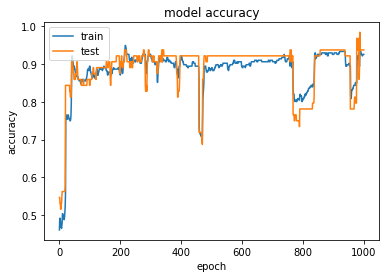

In [11]:
# summarize history for accuracy
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

#### Compilando o Erro Médio

In [12]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=10, verbose=0)

#### Plotando Gráfico do Erro Médio

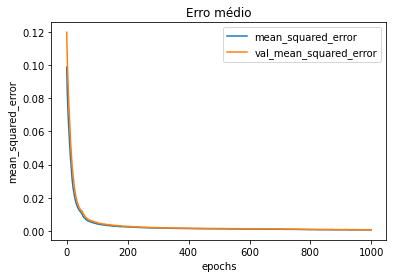

In [13]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()